In [1]:
import cabinetry

We customize the output from `cabinetry` via a helper function. This is optional, and the `logging` module can be used directly as well to further customize the behavior.

In [2]:
cabinetry.set_logging()

Download a workspace from HEPData, extract it, pick a signal with `pyhf patchset apply`. We use a workspace from an ATLAS search for bottom-squark pair production: [JHEP 12 (2019) 060](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/SUSY-2018-31/). The corresponding HEPData entry is [10.17182/hepdata.89408.v3](https://doi.org/10.17182/hepdata.89408.v3).

In [3]:
from pyhf.contrib.utils import download

download("https://www.hepdata.net/record/resource/1935437?view=true", "bottom-squarks")
!pyhf patchset apply bottom-squarks/RegionC/BkgOnly.json bottom-squarks/RegionC/patchset.json\
--name sbottom_600_280_150 --output-file bottom-squarks.json

The `bottom-squarks.json` workspace is now ready to be used. We will run a maximum likelihood fit with `cabinetry` and visualize the results. First, we have a brief look at the content of the workspace:

In [4]:
!pyhf inspect bottom-squarks.json | head -n 6

                                     Summary       
                               ------------------  
                                  channels  3
                                   samples  9
                                parameters  63
                                 modifiers  63


The fit model specified in the workspace is created next.

In [5]:
ws = cabinetry.workspace.load("bottom-squarks.json")
model, data = cabinetry.model_utils.model_and_data(ws)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_CRtt_cuts (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SigRad (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu_SIG (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_ChargeIDSel_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_ID_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_Iso_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_Reco_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_TriggerEff_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_Trigger_TOTAL_1NPCOR_PLUS_UNCOR (1 new n

We can take a look at a yield table for this model. This function also produces a visualization, but we use `close_figure` for now to prevent the figures from rendering to the notebook. We will take a look at the figures afterwards.

In [6]:
cabinetry.visualize.data_MC(model, data, close_figure=True)

DEBUG - cabinetry.model_utils - total stdev is [[3.64], [3.34], [3.87, 1.75, 0.825, 0.417]]
DEBUG - cabinetry.model_utils - total stdev per channel is [3.64, 3.34, 4.96]
INFO - cabinetry.visualize - generating pre-fit yield table
INFO - cabinetry.tabulate - yields per bin:
╒═════════════════════╤═══════════════╤══════════════╤═══════════════╤═════════════╤═════════════╤═════════════╕
│ sample              │ CRtt_cuts     │ CRz_cuts     │ SR_metsigST   │             │             │             │
│                     │ bin 1         │ bin 1        │ bin 1         │ bin 2       │ bin 3       │ bin 4       │
╞═════════════════════╪═══════════════╪══════════════╪═══════════════╪═════════════╪═════════════╪═════════════╡
│ W                   │ 0.00          │ 0.00         │ 0.00          │ 0.00        │ 0.00        │ 0.00        │
├─────────────────────┼───────────────┼──────────────┼───────────────┼─────────────┼─────────────┼─────────────┤
│ Z                   │ 0.32          │ 53.18   

The previous function already created `.pdf` figures. We can call the same function again, this time skipping the table visualization via `include_table=False` but without the `close_figure` setting to have them render directly in the notebook.

DEBUG - cabinetry.model_utils - total stdev is [[3.64], [3.34], [3.87, 1.75, 0.825, 0.417]]
DEBUG - cabinetry.model_utils - total stdev per channel is [3.64, 3.34, 4.96]
DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/CRtt_cuts_prefit.pdf
DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/CRz_cuts_prefit.pdf
DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/SR_metsigST_prefit.pdf


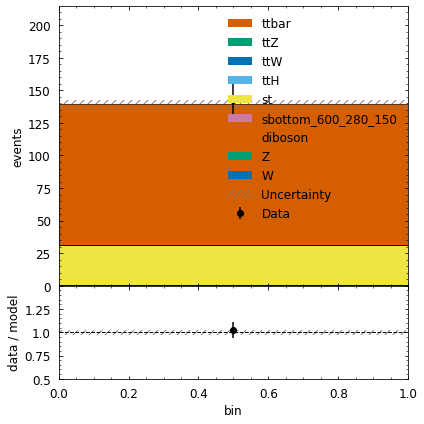

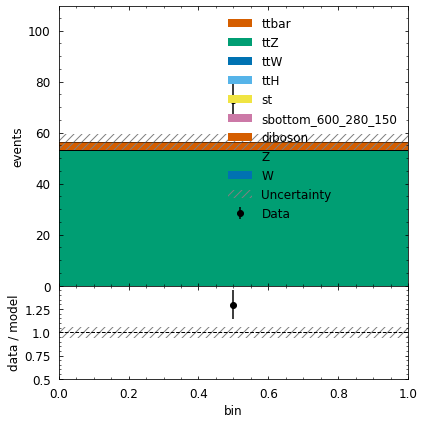

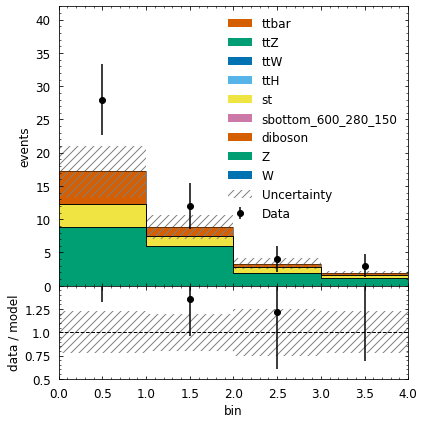

In [7]:
cabinetry.visualize.data_MC(model, data, include_table=False)

Next up is a maximum likelihood fit:

In [8]:
fit_results = cabinetry.fit.fit(model, data)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - MINUIT status:
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 106.2                      │             Nfcn = 7415              │
│ EDM = 0.000109 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 106.162823 at best-fit point
INFO - cabinetry.fit - fit results (with symmetric uncertainties):
INFO - cabine

We can now visualize the post-fit distributions. We skip the yield table creation again with `include_table=False`. The figures are rendered in the notebook, but also saved as `.pdf` files.

DEBUG - cabinetry.model_utils - total stdev is [[120], [8.67], [8.46, 1.84, 1.36, 0.597]]
DEBUG - cabinetry.model_utils - total stdev per channel is [120, 8.67, 10.1]
DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/CRtt_cuts_postfit.pdf
DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/CRz_cuts_postfit.pdf
DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/SR_metsigST_postfit.pdf


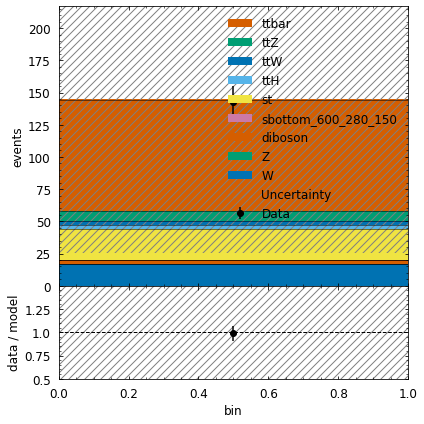

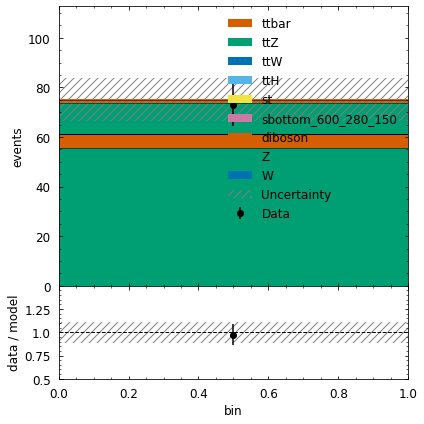

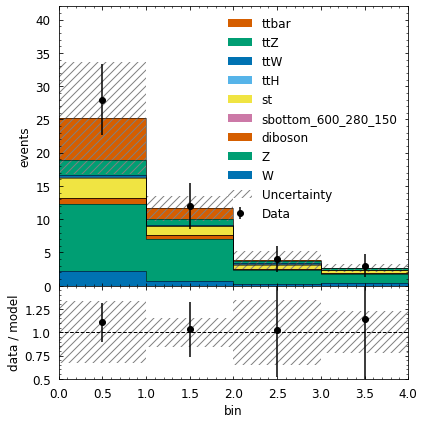

In [9]:
cabinetry.visualize.data_MC(model, data, fit_results=fit_results, include_table=False)

The nuisance parameter pulls and correlations are visualized below.

DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/pulls.pdf


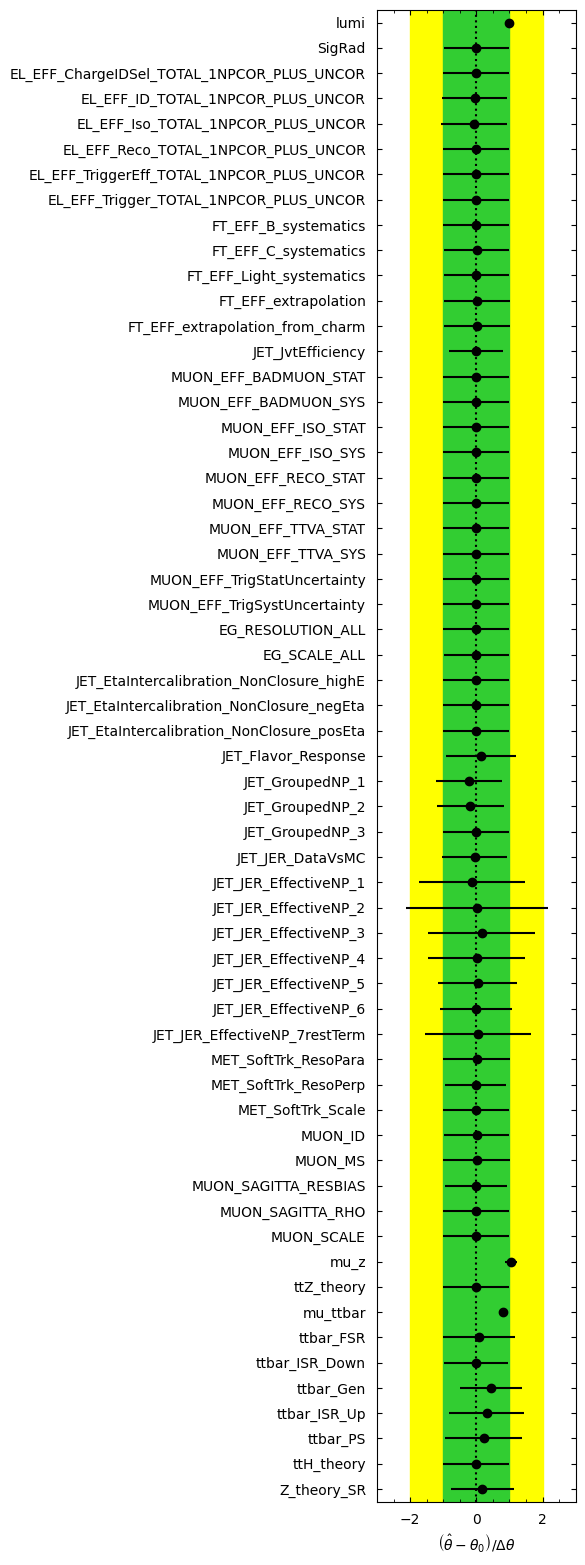

In [10]:
cabinetry.visualize.pulls(fit_results, exclude="mu_SIG")

DEBUG - cabinetry.contrib.matplotlib_visualize - saving figure as figures/correlation_matrix.pdf


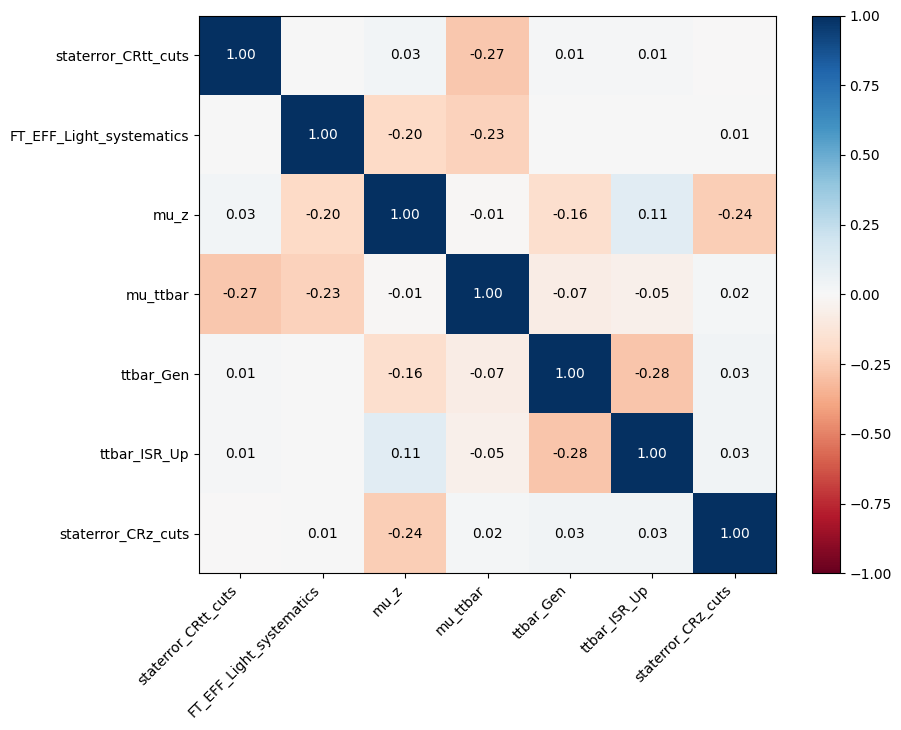

In [11]:
cabinetry.visualize.correlation_matrix(fit_results, pruning_threshold=0.2)